# Sales Analysis and Prediction
This project analyzes retail sales data and builds a model to predict sales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("SampleSuperstore_Simplified.csv")
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,Second Class,CG-12520,Consumer,West,Furniture,Bookcases,261.96,2,0.0,41.9136
1,CA-2016-152157,11/8/16,Second Class,CG-12520,Consumer,West,Furniture,Chairs,731.94,3,0.0,219.5820
2,CA-2016-138688,6/12/16,Standard Class,DV-13045,Corporate,West,Office Supplies,Labels,14.62,2,0.0,6.8714
3,US-2015-108966,10/11/15,Standard Class,SO-20335,Home Office,East,Technology,Phones,957.58,5,0.2,191.5140
4,US-2015-108967,10/11/15,Standard Class,SO-20335,Home Office,East,Technology,Phones,22.37,2,0.2,4.3984


## Step 1: Data Overview

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      5 non-null      object 
 1   Order Date    5 non-null      object 
 2   Ship Mode     5 non-null      object 
 3   Customer ID   5 non-null      object 
 4   Segment       5 non-null      object 
 5   Region        5 non-null      object 
 6   Category      5 non-null      object 
 7   Sub-Category  5 non-null      object 
 8   Sales         5 non-null      float64
 9   Quantity      5 non-null      int64  
 10  Discount      5 non-null      float64
 11  Profit        5 non-null      float64
dtypes: float64(3), int64(1), object(8)
memory usage: 612.0+ bytes


## Step 2: Data Cleaning

In [3]:
# Check for null values and duplicates
df.isnull().sum()
df.duplicated().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)


## Step 3: Exploratory Data Analysis

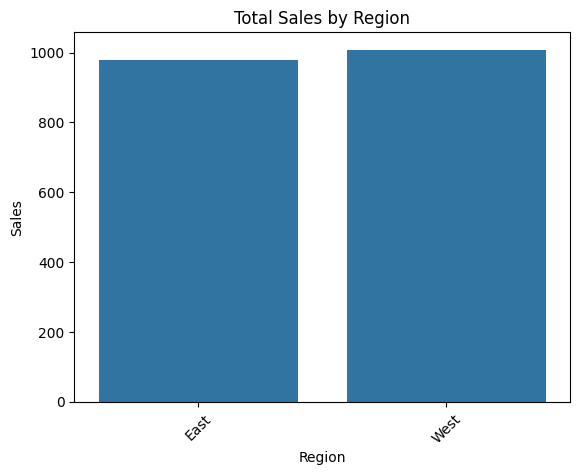

In [4]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum()
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

C:\Users\sravy\AppData\Local\Temp\ipykernel_23508\1490276127.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


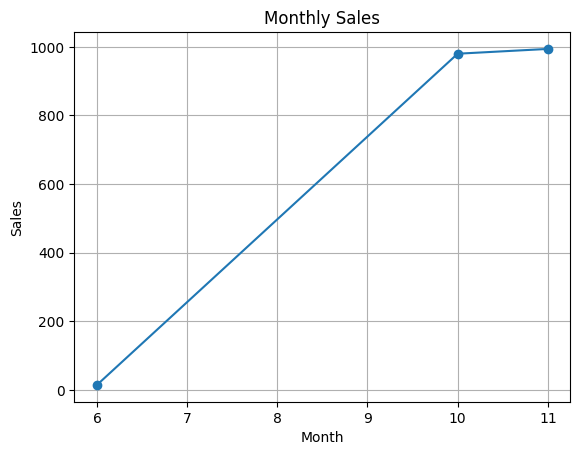

In [5]:
# Monthly Sales Trend (dummy since only few dates here)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## Step 4: Sales Prediction using Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target
X = df[['Quantity', 'Discount']]
y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: nan
MSE: 79475.12751111112


C:\Users\sravy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Step 5: Profit by Category and Sub-Category

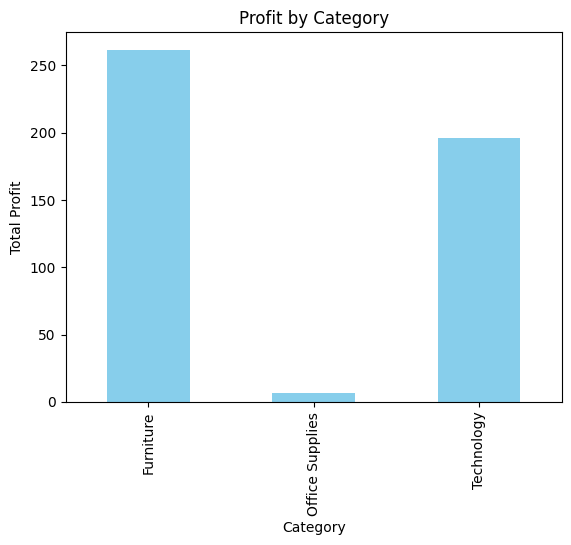

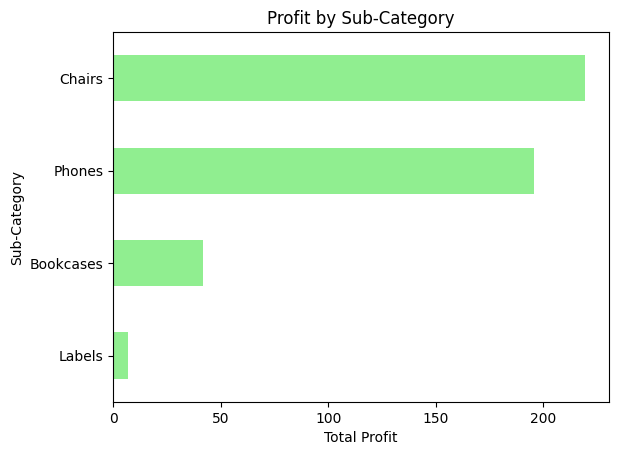

In [7]:
# Total profit by category
df.groupby('Category')['Profit'].sum().plot(kind='bar', title='Profit by Category', color='skyblue')
plt.ylabel('Total Profit')
plt.show()

# Total profit by sub-category
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot(kind='barh', title='Profit by Sub-Category', color='lightgreen')
plt.xlabel('Total Profit')
plt.show()

## Step6: Discount Impact on Sales

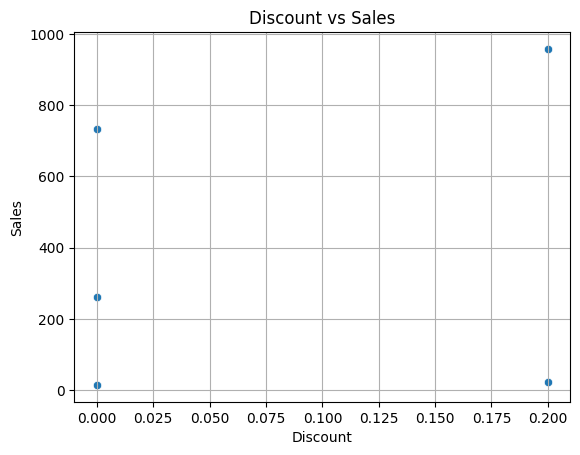

,Discount,Sales
Discount,1.000000,0.197026
Sales,0.197026,1.000000


In [8]:
# Scatter plot to visualize discount vs. sales
sns.scatterplot(data=df, x='Discount', y='Sales')
plt.title('Discount vs Sales')
plt.grid(True)
plt.show()

# Correlation between discount and sales
df[['Discount', 'Sales']].corr()

## Step7: Category-wise Sales and Profit

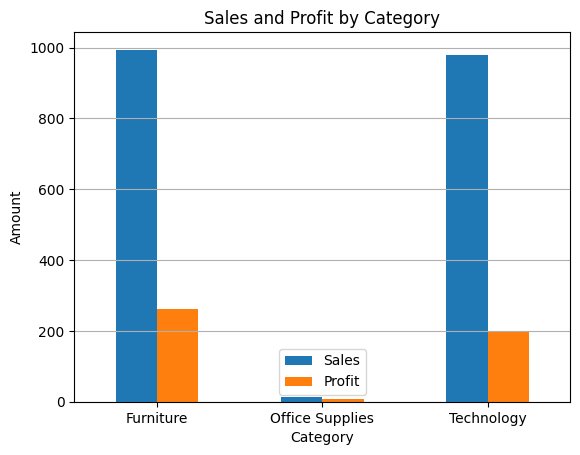

In [9]:
category_data = df.groupby('Category')[['Sales', 'Profit']].sum()
category_data.plot(kind='bar', title='Sales and Profit by Category')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Step7: Shipping Mode Analysis

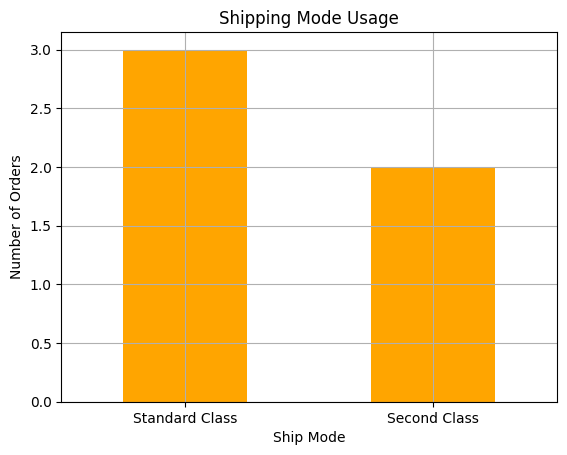

In [11]:
# Count of orders by shipping mode
df['Ship Mode'].value_counts().plot(kind='bar', color='orange', title='Shipping Mode Usage')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()